In [3]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark

In [6]:
  V, E = mesh.load_raw('data/ForwardDesign/mystructure2.obj')
  fusedPts = list(np.loadtxt('data/ForwardDesign/mystructure_fusedPts.txt').reshape((-1, 2)))
  holePts = []  # or load from file if you want, but it should be empty

In [7]:
m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

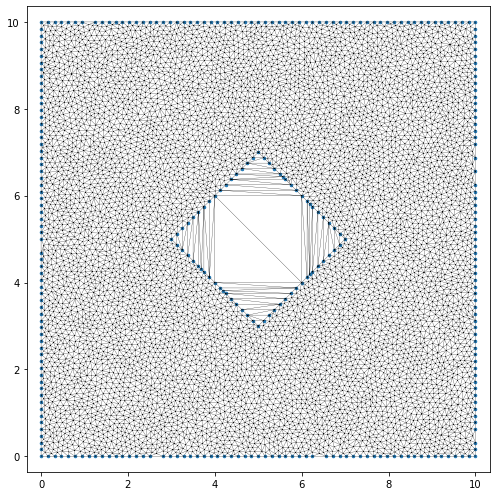

In [8]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))

viewer = Viewer(isheet, wireframe=True)
viewer.show()

In [9]:
import time
import benchmark
import py_newton_optimizer

benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1

# If you want to see the inflation progress in the viewer:
framerate = 5  # Update every 5 iterations
def cb(it):
    if it % framerate == 0:
        viewer.update()

cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

InflatableSheet setVars	0.00729704	1
Newton iterations	93.5503	1
    InflatableSheet energy	0.00035882	1
    Newton iterate	93.5493	114
        Backtracking	0.734988	113
            InflatableSheet energy	0.150474	212
            InflatableSheet setVars	0.57347	212
        Compute descent direction	90.812	113
            newton_step	90.811	113
                Newton solve	87.6614	232
                    CHOLMOD Numeric Factorize	85.6561	231
                    Solve	1.17581	114
                        CHOLMOD Backsub	0.927816	113
                        CHOLMOD Numeric Factorize	0.069721	1
                        CHOLMOD Symbolic Factorize	0.16048	1
                hessEval	3.06125	113
                largestMagnitudeEigenvalue	0.042347	3
        Preamble	1.94248	114
            Callback	1.69416	114
            InflatableSheet energy	0.0567412	114
            InflatableSheet gradient	0.170563	114
Full time	93.5876


In [10]:
from tri_mesh_viewer import TriMeshViewer as Viewer
viewer = Viewer(isheet, wireframe=True)
viewer.show()

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

Step-by-step: Save Inflation Video

In [14]:
#Create the InflatableSheet and the Offscreen Viewer:
from tri_mesh_viewer import OffscreenTriMeshViewer
Run the simulation and update the viewer:Run the simulation and update the viewer:Run the simulation and update the viewer:
isheet = inflation.InflatableSheet(m, iwv)  # or use np.array(iwv) != 0 if needed
oview = OffscreenTriMeshViewer(isheet, width=768, height=640, wireframe=True)

In [15]:
#Set up the optimizer and start recording
import benchmark
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 1000  # or your preferred number of iterations

benchmark.reset()
oview.recordStart('my_inflation2.mp4')  # Output video filename
isheet.pressure = 1  # Adjust pressure as needed

In [16]:
#Run the simulation and update the viewer:
cr = inflation.inflation_newton(
    isheet,
    isheet.rigidMotionPinVars,
    opts,
    callback=lambda it: oview.update()
)
benchmark.report()
oview.recordStop()

InflatableSheet setVars	0.00290394	1
Newton iterations	123.81	1
    InflatableSheet energy	0.00045085	1
    Newton iterate	123.809	118
        Backtracking	0.792127	117
            InflatableSheet energy	0.146346	211
            InflatableSheet setVars	0.630543	211
        Compute descent direction	105.936	117
            newton_step	105.934	117
                Newton solve	102.402	243
                    CHOLMOD Numeric Factorize	100.249	242
                    Solve	1.32358	118
                        CHOLMOD Backsub	1.10827	117
                        CHOLMOD Numeric Factorize	0.0361099	1
                        CHOLMOD Symbolic Factorize	0.162774	1
                hessEval	3.43851	117
                largestMagnitudeEigenvalue	0.0437992	3
        Preamble	17.037	118
            Callback	16.7104	118
            InflatableSheet energy	0.102457	118
            InflatableSheet gradient	0.186527	118
Full time	124.625
